### Mengimport semua kebutuhan library

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Library yang diimport adalah:
1. Pandas untuk menghandle dataframe
2. Seaborn utk plotting data
3. Numpy utk manipulasi integer
3. Sklearn
    1. Untuk memisahkan data train dan data test
    2. Untuk mengambil metric yg digunakan
    3. Untuk mengambil pemodelan Linear Regression
    4. Untuk menggunakan cross validation

### Mengimport csv yang digunakan
data yang digunakan diperoleh dari https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

In [4]:
data = pd.read_csv('cpu_performance.csv')
data.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


### Plot terhadap data

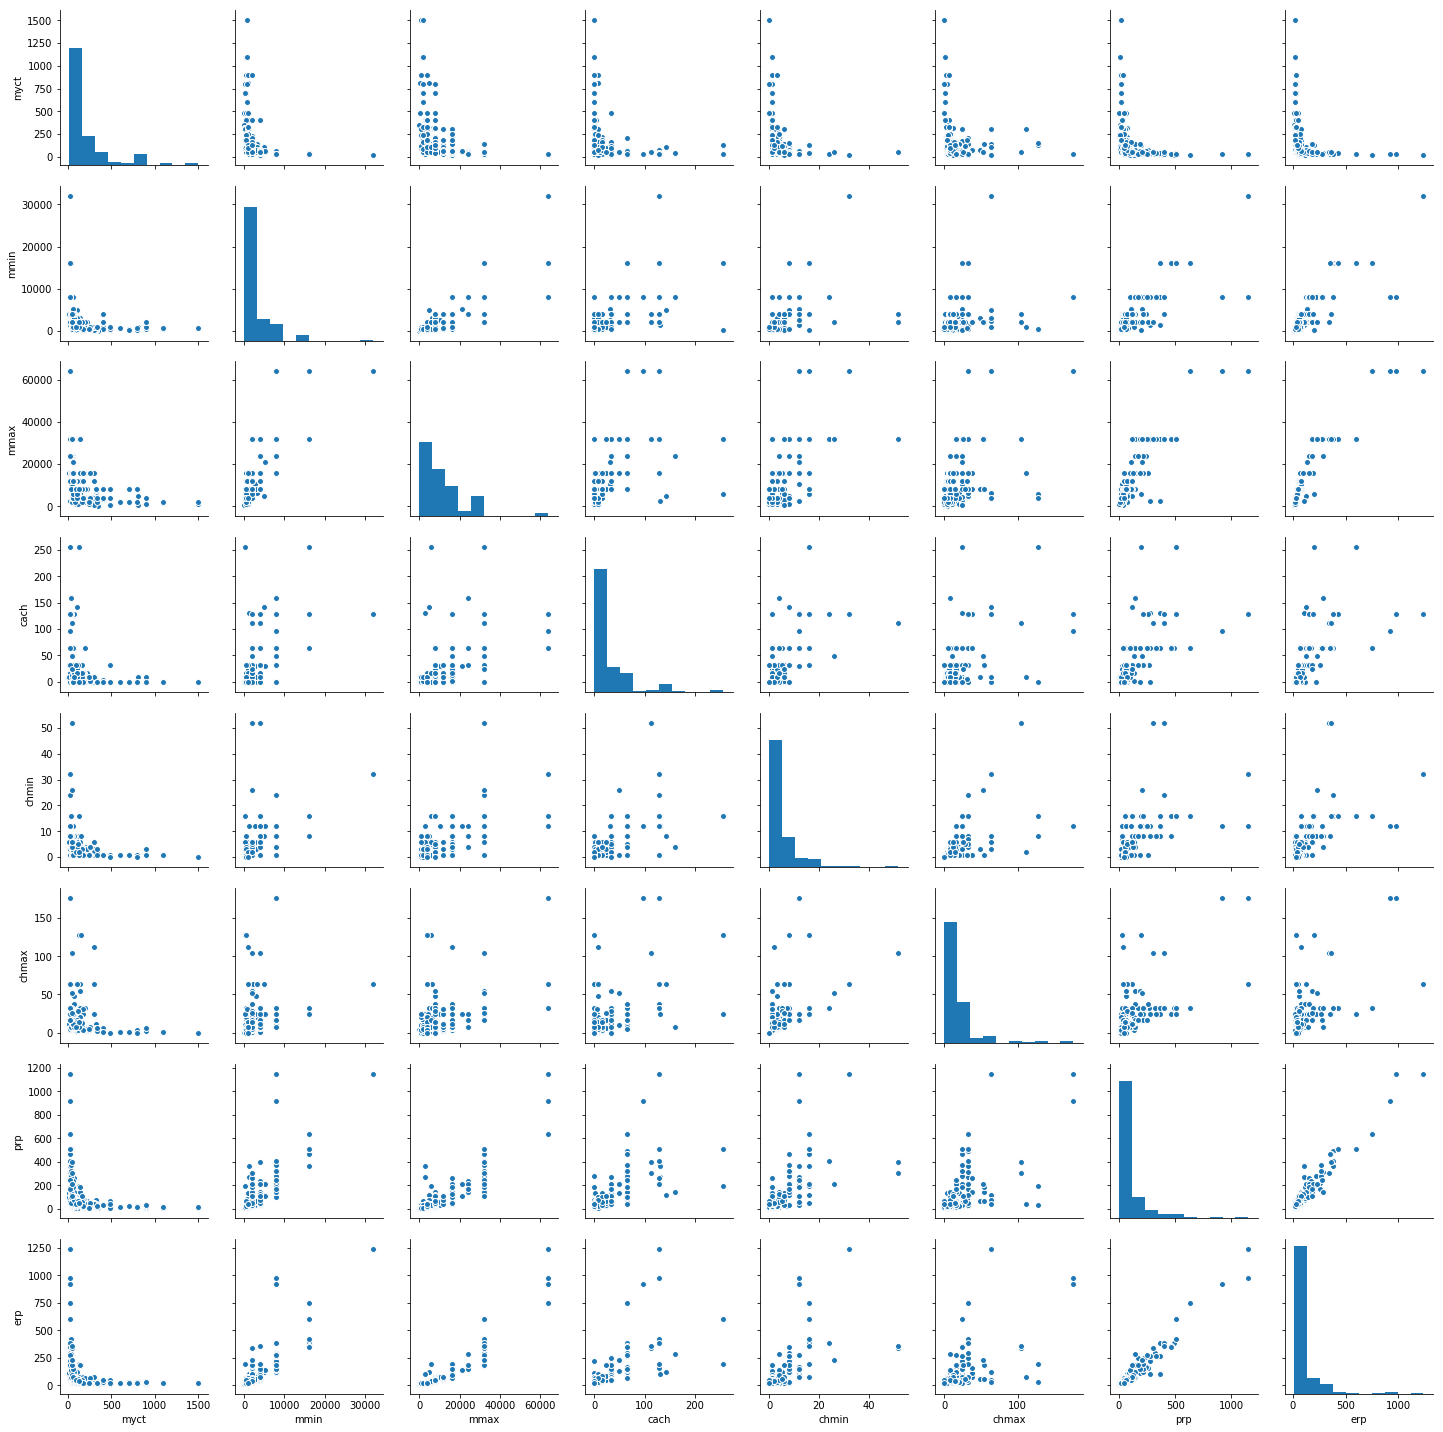

In [6]:
sns.pairplot(data)

### Deskripsi data

In [7]:
data.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


### Buat pemodelan

In [13]:
data_y = data[['erp']]
data_x = data.drop(['erp','model','vendor'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(data_x,
                                                    data_y,
                                                    test_size=0.2)
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
result = pd.DataFrame(columns=['actual','predicted'])
result['actual'] = y_test['erp']
result['predicted'] = clf.predict(x_test)
result.head(10)

,actual,predicted
169,190,195.117519
81,30,40.181952
105,28,26.817764
180,53,79.930737
162,47,43.229851
170,21,2.405459
123,20,46.223352
7,381,468.248919
198,919,782.216015
130,128,159.618319


### Hitung metrics yang dihitung

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(result['actual'], result['predicted']))  
print('Mean Squared Error:', metrics.mean_squared_error(result['actual'], result['predicted']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(result['actual'], result['predicted'])))

Mean Absolute Error: 21.758751348091806
Mean Squared Error: 1310.20241600885
Root Mean Squared Error: 36.19671830441055


### Buat model